In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
class Logistic_regression():
  #declaring learning rate and number of interations'
  def __init__(self,learning_rate,n_iterations, regularization_type = 'none'):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.regularization_type = regularization_type


  #fit function to train the model
  def fit(self,X,Y, lambda_reg):
    #number of data points (rows) in the dataset -> m
    #                                               } this is for gradient descent weight b
    #number of input features in dataset (columns) -> n
    self.m,self.n = X.shape
    #weight , bias
    self.w = np.zeros(self.n)#numpy array for weight values set to 0
    self.b = 0
    self.X = X
    self.Y = Y
    self.lambda_reg = lambda_reg

    #impliment GD
    for i in range (self.n_iterations):
      self.update_weights()

  def update_weights(self):
    # (sigmmoid func)
    y_hat = 1/ (1+np.exp(-(self.X.dot(self.w ) + self.b)))

    #derivaties
    dw = (1/self.m)*np.dot(self.X.T, (y_hat - self.Y)) # .T for matrix multification  x = [253681 x 21] y = [253681 x 1] x.T = [21 x 253681] y = [253681 x 1  ] the dimensions need to be the same
    db = (1/self.m)*np.sum(y_hat - self.Y)

    if self.lambda_reg > 0 :
      if self.regularization_type == 'l2':
        dw += (self.lambda_reg / self.m )* self.w
      elif self.regularization_type == 'l1':
        dw += (self.lambda_reg / self.m) * np.sign(self.w)
    # updating weights , bias using GD
    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db

 #sigmoid and desicion boundry

  def predict(self , X):
    y_pred =  1 / (1+np.exp(-(X.dot(self.w ) + self.b)))
    y_pred = np.where(y_pred > 0.5 , 1 , 0)
    return y_pred


  def metrics(self,Y_test,y_pred):
    # Evaluate performance using metrics
      accuracy = accuracy_score(Y_test, y_pred)
      precision = precision_score(Y_test, y_pred)
      recall = recall_score(Y_test, y_pred)
      f1 = f1_score(Y_test, y_pred)

      # Print evaluation metrics
      print(f'Accuracy: {accuracy:.4f}')
      print(f'Precision: {precision:.4f}')
      print(f'Recall: {recall:.4f}')
      print(f'F1 Score: {f1:.4f}')

      # Generate the confusion matrix
      cm = confusion_matrix(Y_test, y_pred)

      # Print confusion matrix
      print(f'Confusion Matrix:\n{cm}')

      return accuracy, precision, recall, f1 , cm





Preprocess Data:

Normalize the numeric features  
Handle categorical features  



In [ ]:
# Load dataset
file_path = '/content/Dataset1.csv'
data = pd.read_csv(file_path)

# Target and feature columns
target = 'Diabetes'
categorical_columns = ['GenHlth', 'Age', 'Education', 'Income']
numeric_columns = ['BMI', 'MentHlth', 'PhysHlth']

# Separate features and target
X = data.drop(columns=[target])
Y = data[target]

# Standardize BMI
mean_bmi = X['BMI'].mean()
std_bmi = X['BMI'].std()
X['BMI'] = (X['BMI'] - mean_bmi) / std_bmi

# Normalise MentHlth and PhysHlth
for col in ['MentHlth', 'PhysHlth']:
    min_val = X[col].min()
    max_val = X[col].max()
    X[col] = (X[col] - min_val) / (max_val - min_val)

 # Verify   features are  numeric
for col in categorical_columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        print(f"Warning: {col} is not numeric. Applying ordinal encoding.")
        ordinal_mappings = {
            'GenHlth': ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
            'Age': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
            'Education': ['Never Attended', 'Elementary', 'High School', 'Some College', 'College Graduate', 'Graduate'],
            'Income': ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-75k', '>75k']
        }


        # Map values based on ordering
        mapping = {label: idx + 1 for idx, label in enumerate(ordinal_mappings[col])}
        X[col] = X[col].map(mapping)


def preprocess_target(df, target_column):
    # Map the target values to binary (1 = has diabetes, 2 = has  0 = doesn't)
    df[target_column] = df[target_column].replace({
        1: 1,  # Yes
        2: 1,  # Yes
        0: 0,  # No
    })
    return df

# Apply preprocessing to the data
data = preprocess_target(data, 'Diabetes')

# check theres only [0,1]
print(data['Diabetes'].unique())



# check processed features
print(X.head())
print(Y.head())






[0 1]
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck       BMI  Smoker  \
0                     0       1         1          1  1.757932       1   
1                     0       0         0          0 -0.511805       1   
2                     0       1         1          1 -0.057858       0   
3                     0       1         0          1 -0.209173       0   
4                     0       1         1          1 -0.663121       0   

   Stroke  PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  \
0       0             0       0        1  ...              1            0   
1       0             1       0        0  ...              0            1   
2       0             0       1        0  ...              1            1   
3       0             1       1        1  ...              1            0   
4       0             1       1        1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        5    

In [ ]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Y_test = Y_test.replace({
    1: 1,  # Yes
    2: 1,  # Yes
    0: 0,  # No
})






In [10]:
# Define the l rates, num of iterations, and lambda
learning_rates = [0.1, 0.05]
iterations_list = [500, 1000, 1500]
lambda_values = [1.0, 10.0, 100, 1000]

# store results in list
results = []

# Loop through the learning rates and iterations
for lr in learning_rates:
    for iterations in iterations_list:
        # No reg
        model = Logistic_regression(learning_rate=lr, n_iterations=iterations)
        model.fit(X_train, Y_train, lambda_reg=0)
        y_pred = model.predict(X_test)
        accuracy, precision, recall, f1, _ = model.metrics(Y_test, y_pred)
        results.append({'learning_rate': lr, 'iterations': iterations, 'regularization': 'No', 'lambda': 0, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1 , 'predictions': y_pred})

        # L1 reg
        for lambda_reg in lambda_values:
            model = Logistic_regression(learning_rate=lr, n_iterations=iterations, regularization_type='l1')
            model.fit(X_train, Y_train, lambda_reg=lambda_reg)
            y_pred = model.predict(X_test)
            accuracy, precision, recall, f1, _ = model.metrics(Y_test, y_pred)
            results.append({'learning_rate': lr, 'iterations': iterations, 'regularization': 'L1', 'lambda': lambda_reg, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1 , 'predictions': y_pred})

        # L2 reg
        for lambda_reg in lambda_values:
            model = Logistic_regression(learning_rate=lr, n_iterations=iterations, regularization_type='l2')
            model.fit(X_train, Y_train, lambda_reg=lambda_reg)
            y_pred = model.predict(X_test)
            accuracy, precision, recall, f1, _ = model.metrics(Y_test, y_pred)
            results.append({'learning_rate': lr, 'iterations': iterations, 'regularization': 'L2', 'lambda': lambda_reg, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1 , 'predictions': y_pred})

# Convert results to a DF
results_df = pd.DataFrame(results)


Accuracy: 0.7800
Precision: 0.3764
Recall: 0.6174
F1 Score: 0.4677
Confusion Matrix:
[[34671  8124]
 [ 3038  4903]]
Accuracy: 0.7800
Precision: 0.3764
Recall: 0.6174
F1 Score: 0.4677
Confusion Matrix:
[[34671  8124]
 [ 3038  4903]]
Accuracy: 0.7798
Precision: 0.3761
Recall: 0.6176
F1 Score: 0.4675
Confusion Matrix:
[[34660  8135]
 [ 3037  4904]]
Accuracy: 0.7780
Precision: 0.3745
Recall: 0.6241
F1 Score: 0.4681
Confusion Matrix:
[[34516  8279]
 [ 2985  4956]]
Accuracy: 0.7338
Precision: 0.3381
Recall: 0.7318
F1 Score: 0.4625
Confusion Matrix:
[[31418 11377]
 [ 2130  5811]]
Accuracy: 0.7800
Precision: 0.3764
Recall: 0.6174
F1 Score: 0.4677
Confusion Matrix:
[[34671  8124]
 [ 3038  4903]]
Accuracy: 0.7800
Precision: 0.3764
Recall: 0.6176
F1 Score: 0.4677
Confusion Matrix:
[[34669  8126]
 [ 3037  4904]]
Accuracy: 0.7795
Precision: 0.3761
Recall: 0.6199
F1 Score: 0.4681
Confusion Matrix:
[[34627  8168]
 [ 3018  4923]]
Accuracy: 0.7590
Precision: 0.3581
Recall: 0.6814
F1 Score: 0.4695
Confu

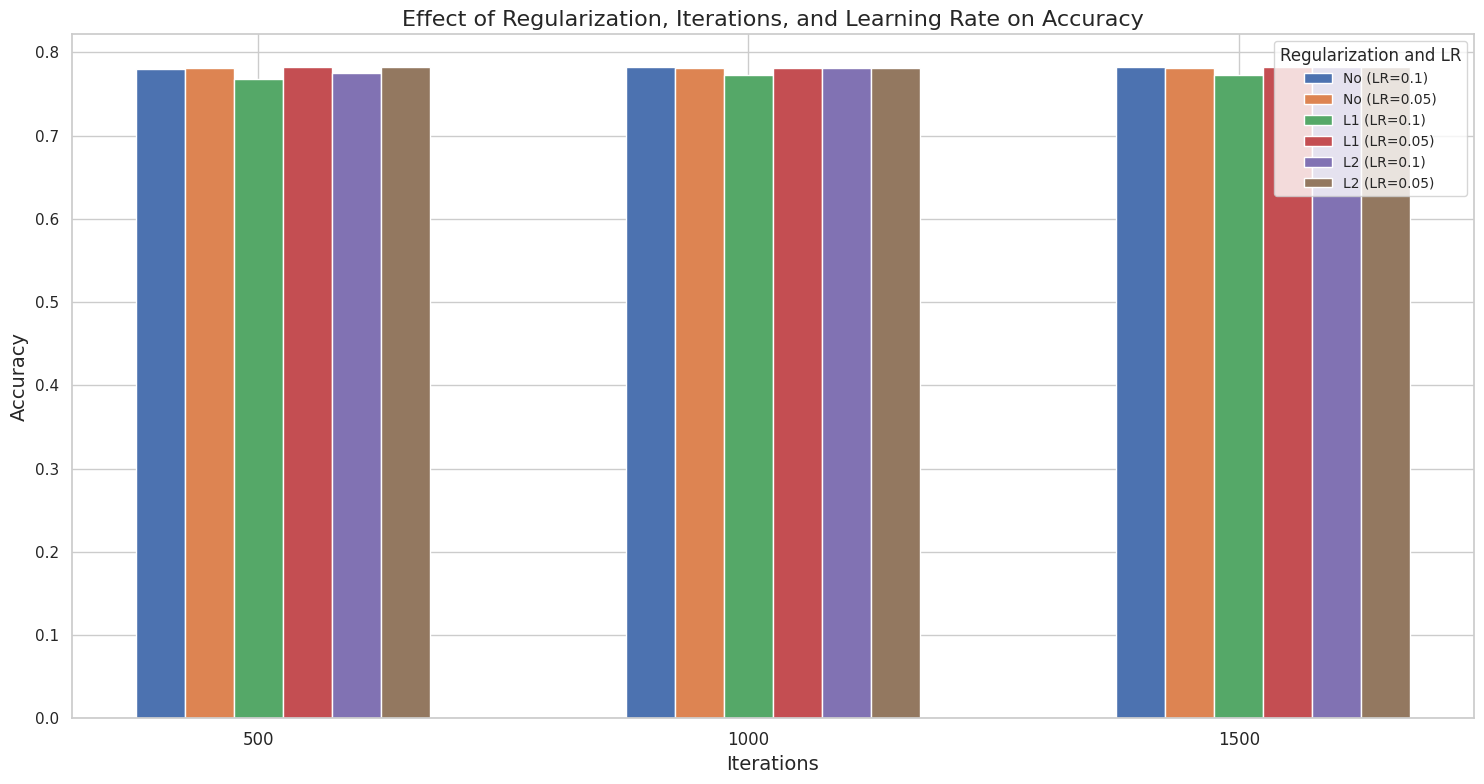

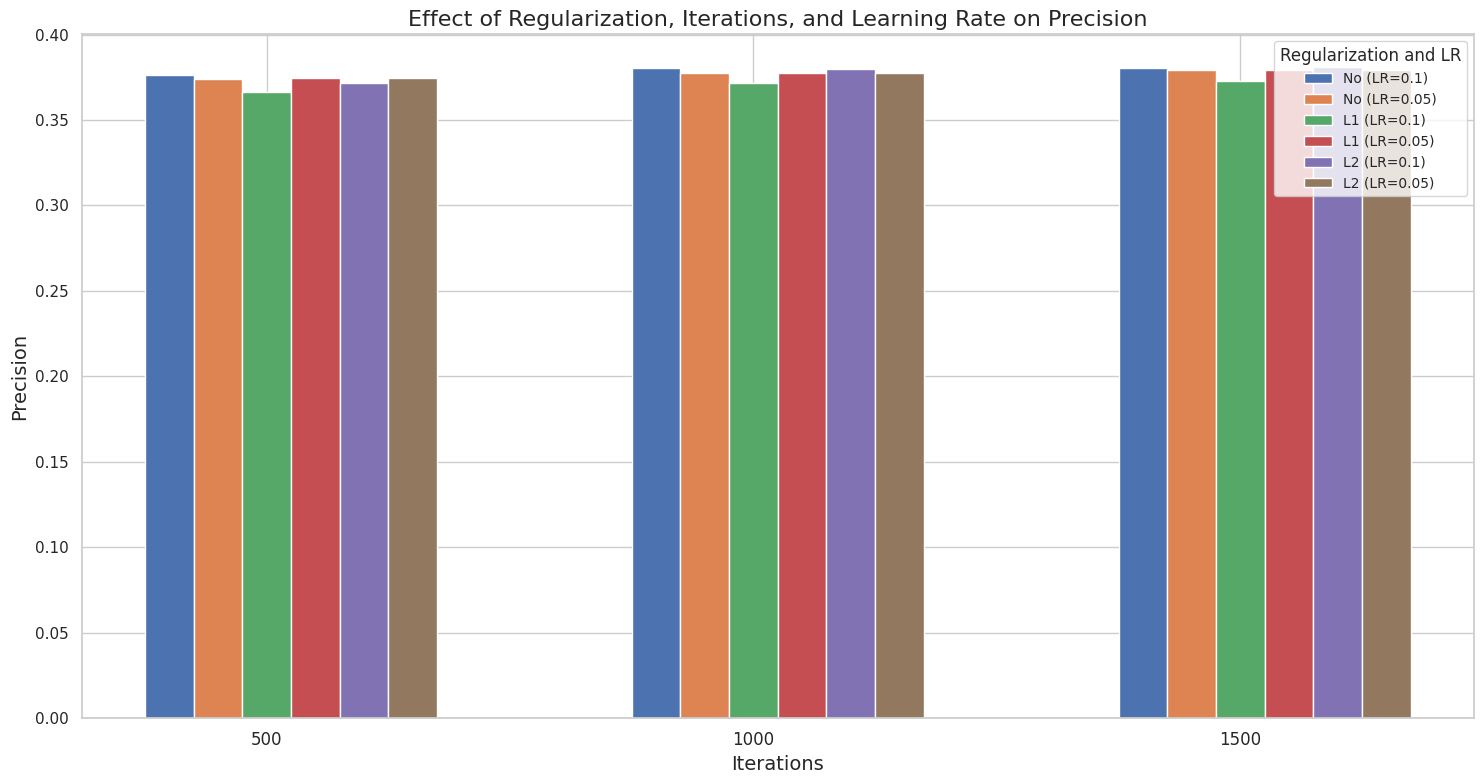

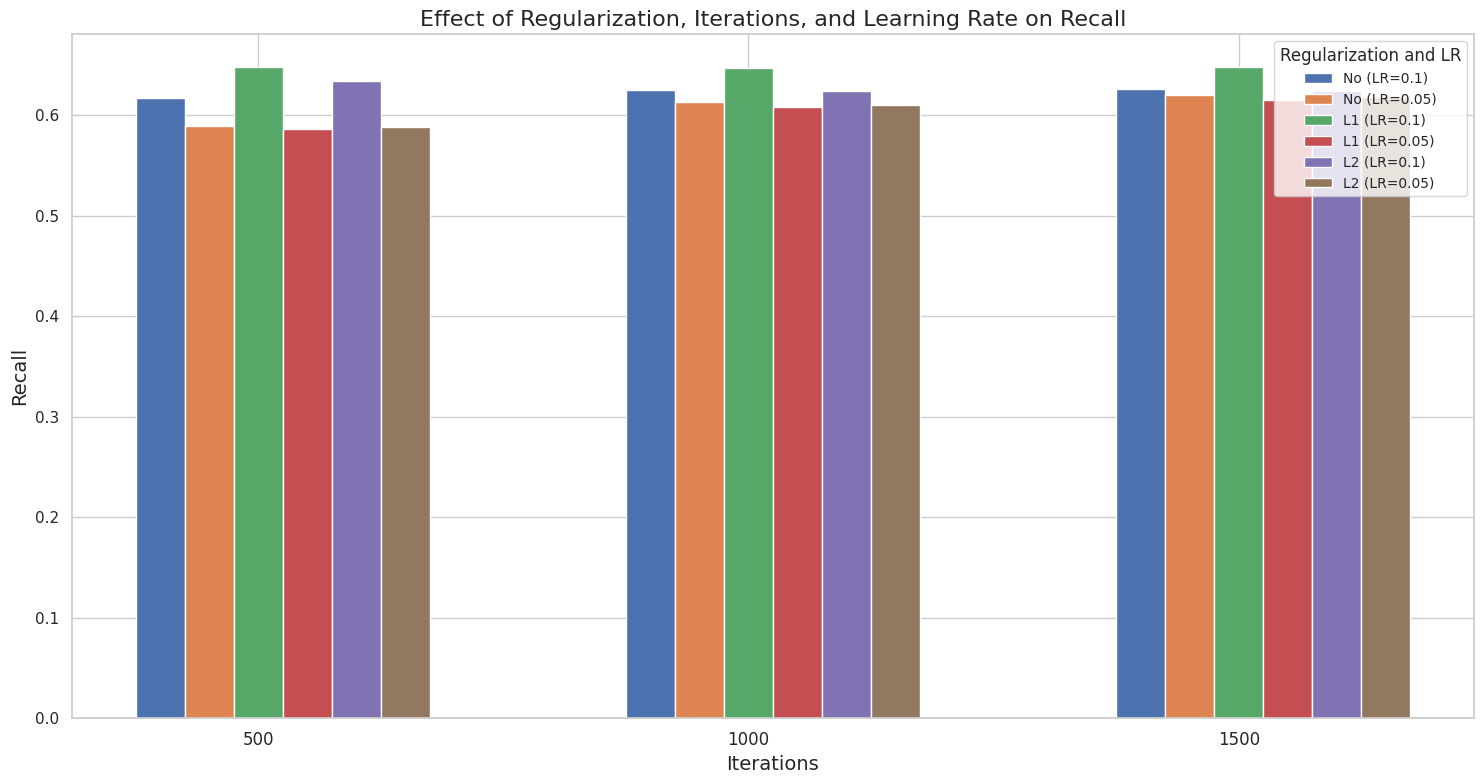

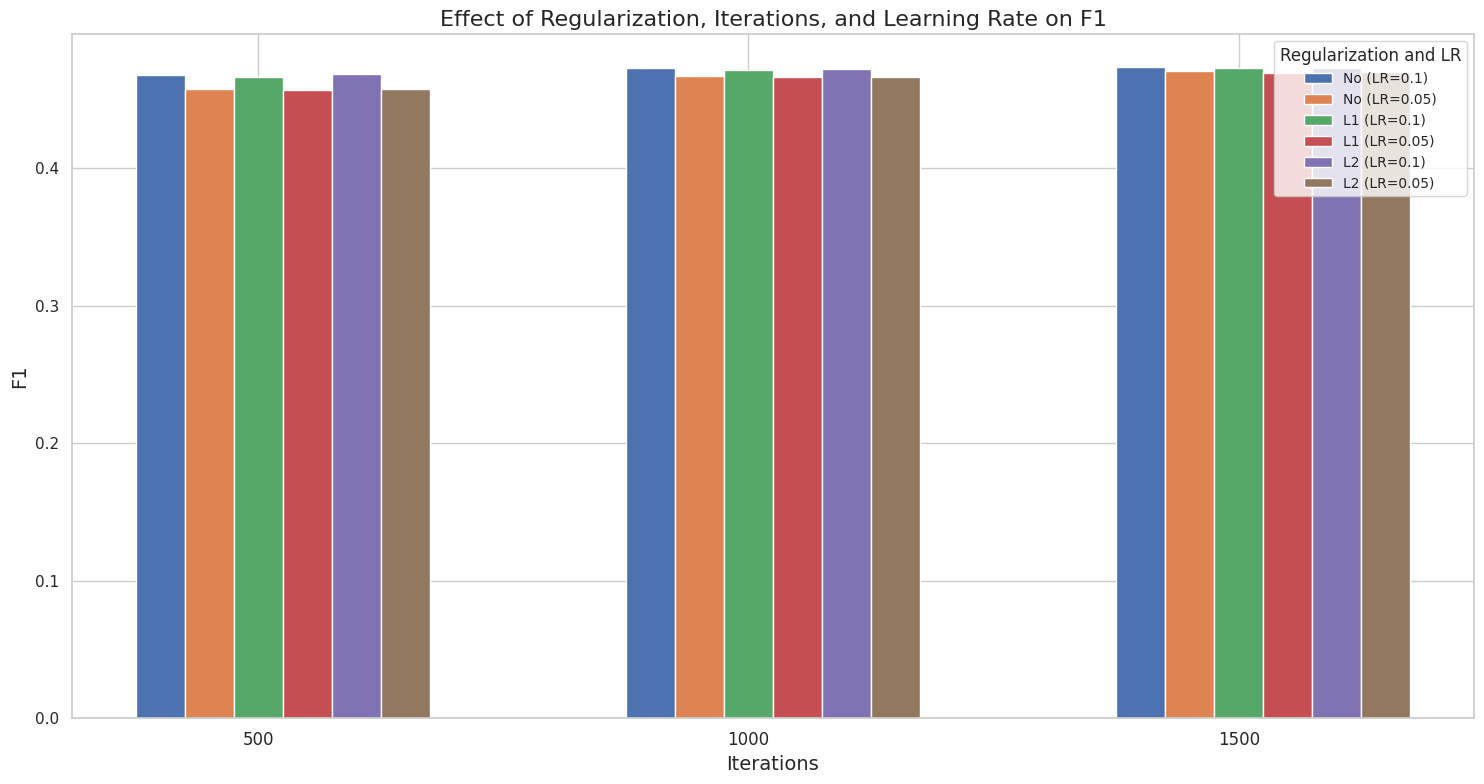

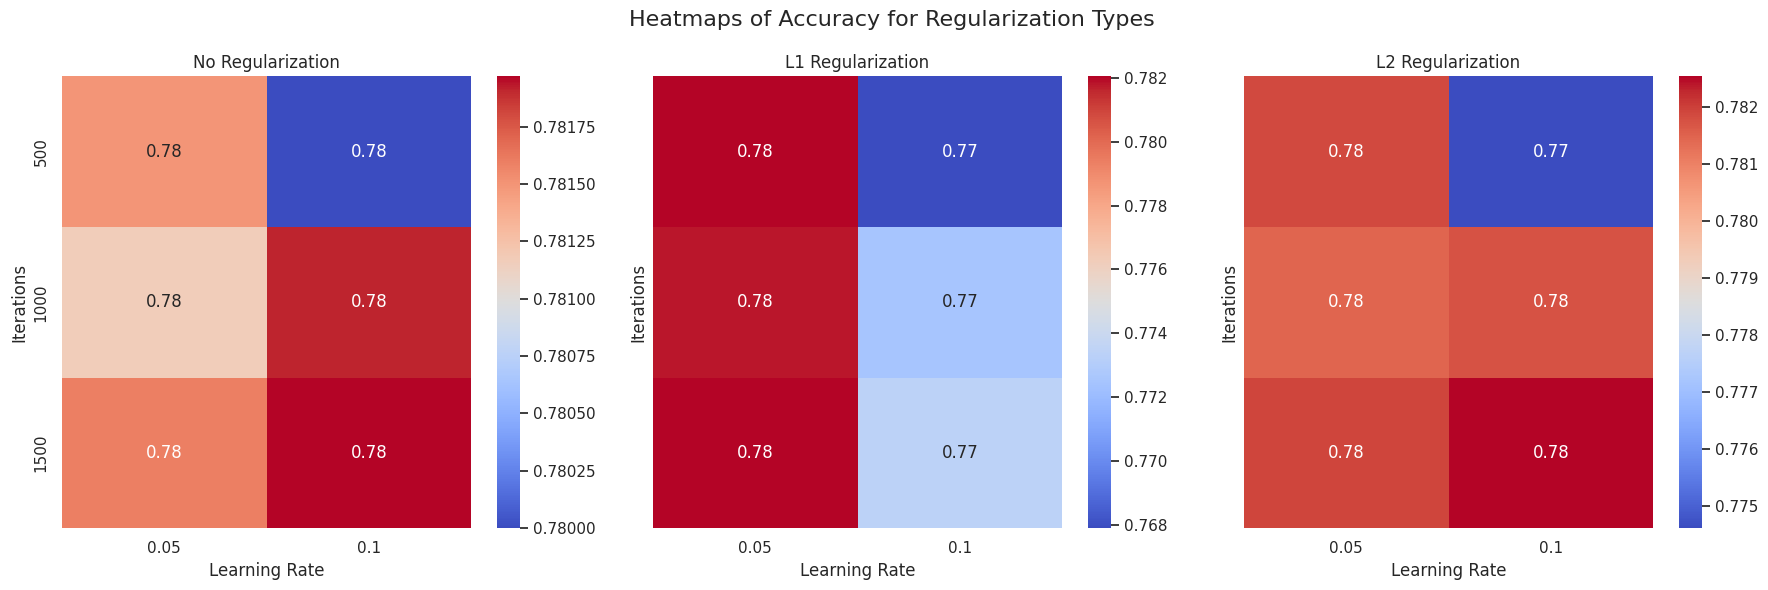

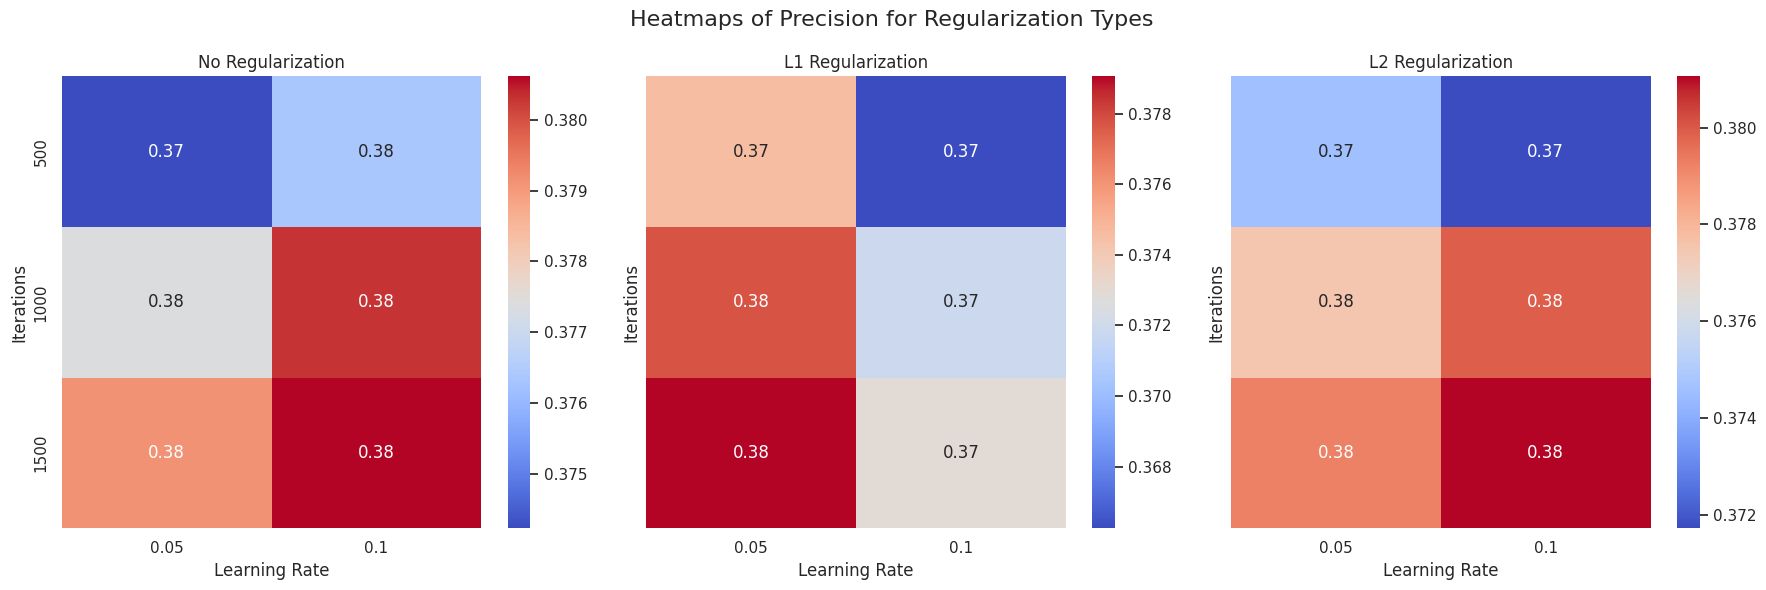

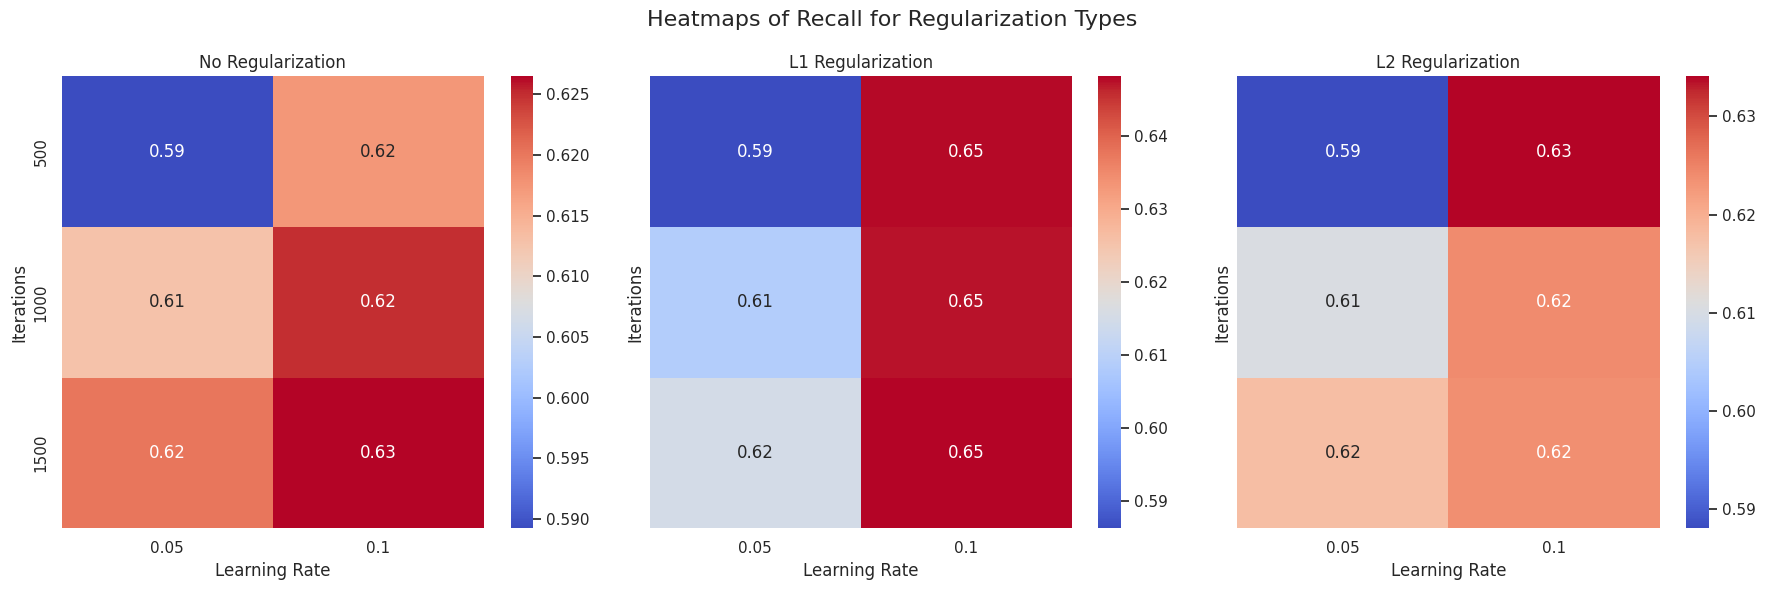

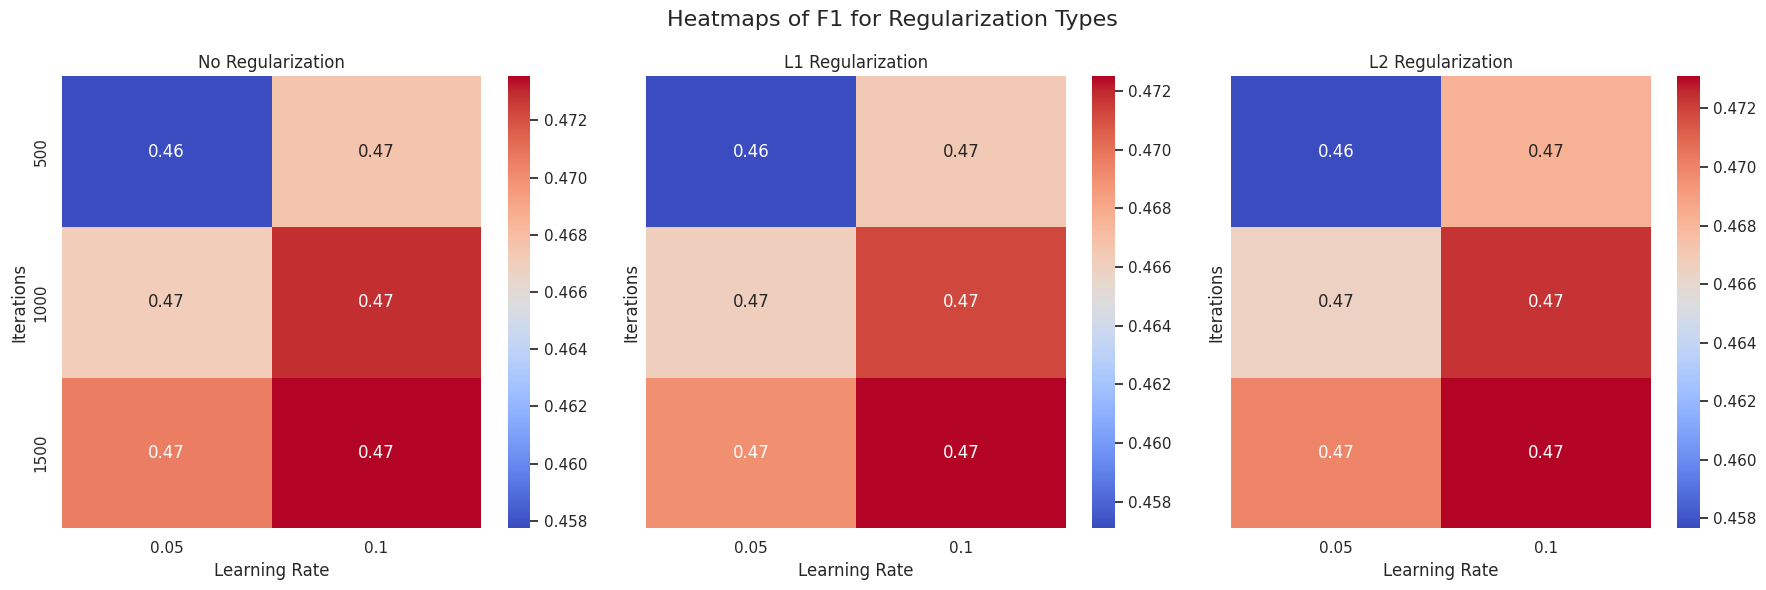

In [11]:
sns.set(style="whitegrid")

# Metrics to visulise
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Ensure numeric columns are correctly handled
numeric_columns = ['iterations', 'learning_rate', 'lambda'] + metrics
results_df[numeric_columns] = results_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Plot grouped bar charts for all metrics
for metric in metrics:
    plt.figure(figsize=(15, 8))
    plt.title(f"Effect of Regularization, Iterations, and Learning Rate on {metric.capitalize()}", fontsize=16)

    # Bar width and positions
    bar_width = 0.2
    x = np.arange(len(iterations_list))  # Position for iterations on x-axis

    for i, reg_type in enumerate(['No', 'L1', 'L2']):
        for j, lr in enumerate(learning_rates):
            # Filter data
            subset = results_df[(results_df['regularization'] == reg_type) &
                                (results_df['learning_rate'] == lr)]

            # Average across lambdas for L1 and L2
            if reg_type in ['L1', 'L2']:
                subset = subset.groupby(['iterations']).mean(numeric_only=True).reset_index()

            # Plot bars
            metric_values = subset[metric]
            plt.bar(x + (i * bar_width) + (j * bar_width / len(learning_rates)),
                    metric_values,
                    bar_width / len(learning_rates),
                    label=f"{reg_type} (LR={lr})")

    # Configure x-axis
    plt.xticks(x + bar_width, iterations_list, fontsize=12)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.legend(loc='upper right', title="Regularization and LR", fontsize=10)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot heatmaps for metric visulization
for metric in metrics:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(f"Heatmaps of {metric.capitalize()} for Regularization Types", fontsize=16)

    # Plot for No Regularization
    no_reg_data = results_df[results_df['regularization'] == 'No']
    pivot_table = no_reg_data.pivot(index='iterations', columns='learning_rate', values=metric)
    sns.heatmap(pivot_table, ax=axes[0], annot=True, fmt=".2f", cmap="coolwarm")
    axes[0].set_title("No Regularization")

    # Plot for L1 Regularization
    l1_data = results_df[results_df['regularization'] == 'L1']
    l1_data = l1_data.groupby(['iterations', 'learning_rate']).mean(numeric_only=True).reset_index()
    pivot_table = l1_data.pivot(index='iterations', columns='learning_rate', values=metric)
    sns.heatmap(pivot_table, ax=axes[1], annot=True, fmt=".2f", cmap="coolwarm")
    axes[1].set_title("L1 Regularization")

    # Plot for L2 Regularization
    l2_data = results_df[results_df['regularization'] == 'L2']
    l2_data = l2_data.groupby(['iterations', 'learning_rate']).mean(numeric_only=True).reset_index()
    pivot_table = l2_data.pivot(index='iterations', columns='learning_rate', values=metric)
    sns.heatmap(pivot_table, ax=axes[2], annot=True, fmt=".2f", cmap="coolwarm")
    axes[2].set_title("L2 Regularization")

    # Set shared labels
    for ax in axes:
        ax.set_xlabel("Learning Rate")
        ax.set_ylabel("Iterations")

    plt.tight_layout()
    plt.show()


In [12]:
sns.set(style="whitegrid")

# Metrics to visualize
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Ensure numeric columns are handled
numeric_columns = ['iterations', 'learning_rate', 'lambda'] + metrics
results_df[numeric_columns] = results_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Find the best and worst models for each regularization type based on F1 score
best_models = results_df.loc[results_df.groupby('regularization')['f1'].idxmax()]
worst_models = results_df.loc[results_df.groupby('regularization')['f1'].idxmin()]

# Find the overall best and worst
overall_best_model = results_df.loc[results_df['f1'].idxmax()]
overall_worst_model = results_df.loc[results_df['f1'].idxmin()]

# Print overall best and worst model details
print("Overall Best Model Based on F1 Score:")
print(overall_best_model)
print("\nOverall Worst Model Based on F1 Score:")
print(overall_worst_model)

# Retrieve the best and worst model predictions from results_df
y_pred_best = overall_best_model['predictions']
y_pred_worst = overall_worst_model['predictions']

# get the true labels for both models
y_true_best = Y_test
y_true_worst = Y_test

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_true_best, y_pred_best)
print("\nConfusion \ Matrix for the Best Model:")
print(cm_best)

# Confusion Matrix for the worst model
cm_worst = confusion_matrix(y_true_worst, y_pred_worst)
print("\nConfusion Matrix for the Worst Model:")
print(cm_worst)


Overall Best Model Based on F1 Score:
learning_rate                                                   0.1
iterations                                                     1500
regularization                                                   L1
lambda                                                        100.0
accuracy                                                   0.782442
precision                                                  0.381223
recall                                                     0.625866
f1                                                          0.47383
predictions       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 21, dtype: object

Overall Worst Model Based on F1 Score:
learning_rate                                                  0.05
iterations                                                      500
regularization                                                   L1
lambda                                                       1000.0
accuracy      